# World's Fastest Growing Economies as of 2018

This project seeks to find out countries with eceonomy growth. This data was gotten from <a>"https://en.wikipedia.org/wiki/List_of_countries_by_real_GDP_growth_rate"<a> by web scraping and loading the table from the website. 
## Let's dive in.

In [1]:
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import requests
import csv

url = "https://en.wikipedia.org/wiki/List_of_countries_by_real_GDP_growth_rate"
req = requests.get(url)

In [2]:
req.status_code

200

In [3]:
req.text

'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>List of countries by real GDP growth rate - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"922bae8a-20f1-4b65-8022-430c40d66c59","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_countries_by_real_GDP_growth_rate","wgTitle":"List of countries by real GDP growth rate","wgCurRevisionId":1043021245,"wgRevisionId":1043021245,"wgArticleId":8679095,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description is different from Wikidat

In [4]:
soup = bs(req.text, 'html5lib')

In [5]:
#soup.title

In [6]:
#links = soup.find_all('a')

In [7]:
"""
for link in links:
    print('----------------------------------------------------------------')
    print(link.get('href'))
    print('----------------------------------------------------------------')
print(len(links)) 
"""   

"\nfor link in links:\n    print('----------------------------------------------------------------')\n    print(link.get('href'))\n    print('----------------------------------------------------------------')\nprint(len(links)) \n"

In [8]:
df = pd.read_html("https://en.wikipedia.org/wiki/List_of_countries_by_real_GDP_growth_rate")

In [9]:
gdp_growthrate = df[1]

In [10]:
gdp_growthrate.dtypes

Rank                          object
Country/region                object
Real GDP growthrate (%)[2]    object
dtype: object

In [11]:
gdp_growthrate.head(10)

,Rank,Country/region,Real GDP growthrate (%)[2]
0,194,Libya,-59.71
1,170,Dominica,-10.44
2,5,Bangladesh,3.79
3,2,Ethiopia,6.05
4,145,Armenia,-7.57
5,4,Tajikistan,4.5
6,48,Djibouti,-1
7,56,Nepal,-1.87
8,85,Cambodia,-3.53
9,9,Vietnam,2.90


In [12]:
gdp_growthrate.shape

(195, 3)

In [13]:
growth_overtime = df[2]

In [14]:
growth_overtime.head()

,Country,2013,2014,2015,2016,2017,2018[4],Avg
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan.mw-parser-output .hatnote{font-sty...,3.90,2.69,1.31,2.37,2.60,2.3,2.53
2,Albania (more),1.00,1.77,2.22,3.35,3.84,3.9,2.67
3,Algeria (more),2.77,3.79,3.76,3.30,1.70,2.5,2.97
4,Angola (more),6.81,4.80,3.00,-0.81,0.72,-0.1,2.37


In [15]:
growth_overtime.shape

(194, 8)

In [16]:
growth_overtime

,Country,2013,2014,2015,2016,2017,2018[4],Avg
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan.mw-parser-output .hatnote{font-sty...,3.90,2.69,1.31,2.37,2.60,2.3,2.53
2,Albania (more),1.00,1.77,2.22,3.35,3.84,3.9,2.67
3,Algeria (more),2.77,3.79,3.76,3.30,1.70,2.5,2.97
4,Angola (more),6.81,4.80,3.00,-0.81,0.72,-0.1,2.37
...,...,...,...,...,...,...,...,...
189,Venezuela (more),1.34,-3.89,-5.72,-18.00,-14.00,-18.0,-10.01
190,Vietnam (more),5.42,5.98,6.68,6.21,6.81,6.6,6.28
191,Yemen (more),4.82,-0.19,-28.00,-34.34,-2.00,-2.6,-11.76
192,Zambia (more),5.06,4.70,2.92,3.76,4.08,3.8,4.05


## Cleaning The Data

In [17]:
gdp_growthrate.isnull().sum()

Rank                          0
Country/region                0
Real GDP growthrate (%)[2]    2
dtype: int64

In [18]:
#Identity Missing Value Index

missing_data = gdp_growthrate[gdp_growthrate.isnull().any(axis=1)].index.values.tolist()


#To get the missing values in a dataframe
gdp_growthrate.iloc[missing_data,:]

,Rank,Country/region,Real GDP growthrate (%)[2]
73,-,American Samoa[note 1],NaN
192,-,Syria,NaN


In [19]:
gdp_growthrate.drop([189], axis=0, inplace=True)
gdp_growthrate.isnull().sum()

Rank                          0
Country/region                0
Real GDP growthrate (%)[2]    2
dtype: int64

In [20]:
gdp_growthrate.dtypes

Rank                          object
Country/region                object
Real GDP growthrate (%)[2]    object
dtype: object

In [21]:
gdp_growthrate = gdp_growthrate.rename( columns={'Real GDP growthrate (%)[2]' : "GDP_growthrate%"})

In [22]:
change = ["GDP_growthrate%"]
for col in change:
    gdp_growthrate[col] = gdp_growthrate[col].str.split('|', expand=True)[0]
    gdp_growthrate[col] = gdp_growthrate[col].str.replace(' ', '')


gdp_growthrate['GDP_growthrate%'] = gdp_growthrate['GDP_growthrate%'].astype(float)

In [23]:
gdp_growthrate.dtypes

Rank                object
Country/region      object
GDP_growthrate%    float64
dtype: object

In [24]:
growth_overtime.isnull().sum()

Country    1
2013       6
2014       6
2015       6
2016       6
2017       6
2018[4]    3
Avg        8
dtype: int64

In [25]:
growth_overtime.dtypes

Country     object
2013       float64
2014       float64
2015       float64
2016       float64
2017       float64
2018[4]    float64
Avg        float64
dtype: object

In [26]:
#Identity Missing Value Index
missing = growth_overtime[growth_overtime.isnull().any(axis=1)].index.values.tolist()


#To get the missing values in a dataframe
growth_overtime.iloc[missing,:]



,Country,2013,2014,2015,2016,2017,2018[4],Avg
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,Bhutan (more),2.14,5.75,6.60,7.99,6.82,NaN,NaN
52,Eritrea (more),NaN,NaN,NaN,NaN,NaN,4.1,NaN
119,Nauru (more),NaN,NaN,NaN,NaN,NaN,-2.3,NaN
148,Samoa (more),-1.93,1.20,1.64,7.15,2.50,NaN,NaN
160,Somalia (more),NaN,NaN,NaN,NaN,NaN,3.1,NaN
163,South Sudan (more),NaN,NaN,NaN,NaN,NaN,-3.2,NaN
170,Taiwan (more),NaN,NaN,NaN,NaN,NaN,2.7,NaN


In [27]:
growth_overtime.drop(missing, axis=0, inplace=True)
growth_overtime.isnull().sum()

Country    0
2013       0
2014       0
2015       0
2016       0
2017       0
2018[4]    0
Avg        0
dtype: int64

In [28]:
growth_overtime = growth_overtime.rename( columns={'2018[4]' : 2018})

In [29]:
growth_overtime.iloc[0, :]

Country    Afghanistan.mw-parser-output .hatnote{font-sty...
2013                                                     3.9
2014                                                    2.69
2015                                                    1.31
2016                                                    2.37
2017                                                     2.6
2018                                                     2.3
Avg                                                     2.53
Name: 1, dtype: object

In [30]:
growth_overtime['Country'] = growth_overtime['Country'].str.split('.', expand=True)[0]

In [31]:
growth_overtime.head(2)

,Country,2013,2014,2015,2016,2017,2018,Avg
1,Afghanistan,3.9,2.69,1.31,2.37,2.60,2.3,2.53
2,Albania (more),1.0,1.77,2.22,3.35,3.84,3.9,2.67


In [32]:
growth_overtime['Country'] = growth_overtime['Country'].str.split(' ', expand=True)[0]

In [33]:
growth_overtime.head(2)

,Country,2013,2014,2015,2016,2017,2018,Avg
1,Afghanistan,3.9,2.69,1.31,2.37,2.60,2.3,2.53
2,Albania,1.0,1.77,2.22,3.35,3.84,3.9,2.67


# Data Exploratory Analysis

In [34]:
#Country with least growth  over the years

least_growth = growth_overtime.sort_values(by='Avg').head()
least_growth

,Country,2013,2014,2015,2016,2017,2018,Avg
191,Yemen,4.82,-0.19,-28.00,-34.34,-2.00,-2.6,-11.76
189,Venezuela,1.34,-3.89,-5.72,-18.00,-14.00,-18.0,-10.01
51,Equatorial,-4.13,0.42,-9.10,-8.58,-3.22,-7.7,-5.45
47,East,-11.00,-26.05,20.88,0.83,-8.00,0.8,-4.81
32,Central,-36.70,1.04,4.80,4.53,4.30,4.3,-4.42


In [35]:
#Countries with Higest growth Over the years 

highest_growth = growth_overtime.sort_values(by='Avg', ascending=False).head()
highest_growth

,Country,2013,2014,2015,2016,2017,2018,Avg
55,Ethiopia,10.58,10.26,10.39,7.56,10.25,7.4,9.40
79,Ireland,1.64,8.33,25.56,5.14,7.80,4.7,8.60
82,Ivory,8.89,8.79,8.84,8.34,7.80,7.4,8.34
44,Djibouti,7.95,8.92,9.68,8.72,4.09,6.7,7.66
179,Turkmenistan,10.20,10.30,6.50,6.20,6.50,6.1,7.62


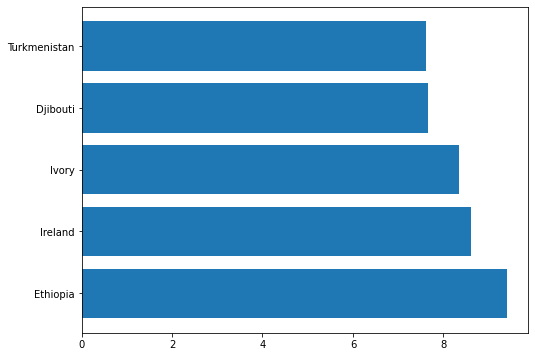

In [36]:
Country = highest_growth['Country']
Growth = highest_growth['Avg']
 
# Figure Size
fig = plt.figure(figsize =(8, 6))
 
plt.barh(Country, Growth)
 
# Show Plot
plt.show()

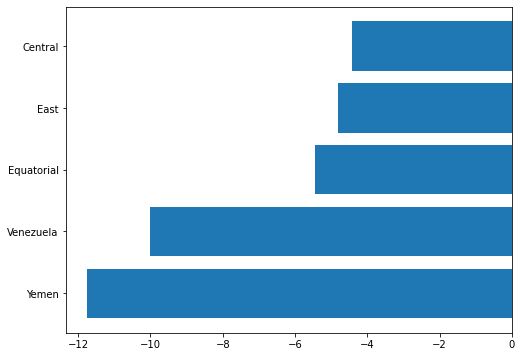

In [37]:
Country = least_growth['Country']
Growth = least_growth['Avg'].sort_values()
 
# Figure Size
fig = plt.figure(figsize =(8, 6))
 
plt.barh(Country, Growth)
 
# Show Plot
plt.show()

## Insights 

From my analysis and graphs above, it can be seen that as of 2018, the country's with highest growth are Ethopia, Ireland, Ivory, Djibouti and Turkmenistan with an average growth of 9.40, 8.60, 8.34, 7.66 and 7.62 respectively. While Yemen has the least average growth of -11.76 over the years. 